<a href="https://colab.research.google.com/github/abishek2019/Datasets/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Params:  [-15682.27021631    115.41845202]
Training RMSE: 64083.51.
Training cost: 2053348364.32.
Test RMSE: 65773.19.
Test cost: 2163056355.39.


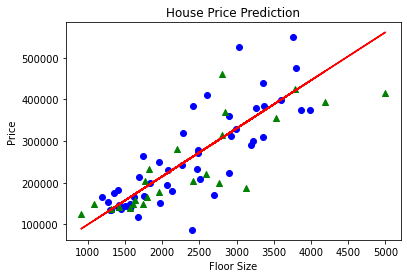

<Figure size 432x288 with 0 Axes>

In [3]:
## Simple Regression Exercise

import argparse
import sys
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt


# Read data matrix X and labels t from text file.
def read_data(file_name):
  if file_name == "train.txt":
    link = "https://raw.githubusercontent.com/abishek2019/Datasets/main/train.txt"
  else:
    link = "https://raw.githubusercontent.com/abishek2019/Datasets/main/test.txt"
  df = pd.read_csv(link, sep="    ", header = None,  names=["A", "B"], engine = 'python')
  X = np.array(df.A)
  t = np.array(df.B)
  return X, t


# Implement simple linear regression to compute w = [w0, w1].
def train(X, t):
  sum_x_n = sum(X)
  sum_t_n = sum(t)
  sum_x_n2 = sum([pow(x, 2) for x in X])
  sum_x_n_t_n = sum([X[i]* t[i] for i in range(len(X))])
  A = np.array([[len(X), sum_x_n], [sum_x_n, sum_x_n2]])
  b = np.array([sum_t_n, sum_x_n_t_n])
  w = np.linalg.solve(A, b)
  return w


# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
  y_dash_array = [(w[0] + w[1] * X[i]) for i in range(len(X))]
  sum_of_squares = sum([pow((y_dash_array[i] - t[i]), 2) for i in range(len(X))])
  return np.sqrt((sum_of_squares / len(X)))


# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
  y_dash_array = [(w[0] + w[1] * X[i]) for i in range(len(X))]
  sum_of_squares = sum([pow((y_dash_array[i] - t[i]), 2) for i in range(len(X))])
  return (sum_of_squares / (2 * len(X)))


##======================= Main program =======================##
# parser = argparse.ArgumentParser('Simple Regression Exercise.')
# parser.add_argument('-i', '--input_data_dir',
#                     type=str,
#                     default='../data/simple',
#                     help='Directory for the simple houses dataset.')
# FLAGS, unparsed = parser.parse_known_args()

# Read the training and test data.
Xtrain, ttrain = read_data("train.txt")
Xtest, ttest = read_data("test.txt")

# Train model on training examples.
w = train(Xtrain, ttrain)

# Print model parameters.
print('Params: ', w)

# Print cost and RMSE on training data.
print('Training RMSE: %0.2f.' % compute_rmse(Xtrain, ttrain, w))
print('Training cost: %0.2f.' % compute_cost(Xtrain, ttrain, w))

# Print cost and RMSE on test data.
print('Test RMSE: %0.2f.' % compute_rmse(Xtest, ttest, w))
print('Test cost: %0.2f.' % compute_cost(Xtest, ttest, w))

#  YOUR CODE here: plot the training and test examples with different symbols,
#                  plot the linear approximation on the same graph.
x = np.concatenate([Xtrain, Xtest])
y = [(w[0] + w[1] * x[i]) for i in range(len(x))]
plt.scatter(Xtrain, ttrain, c = 'blue')
plt.scatter(Xtest, ttest, c = 'green', marker = '^')
plt.plot(x, y, color = 'red')
plt.title('House Price Prediction')
plt.xlabel('Floor Size')
plt.ylabel('Price')
plt.show()
plt.savefig('train-test-line.png')
